In [1]:
# project: p2
# submitter: Istekov@wisc.edu
# partner: none
# hours: 12

In [2]:
import loans
import search

In [3]:
applicant = loans.Applicant("20-30", ["1", "2", "6"])
applicant.race

{'American Indian or Alaska Native', 'Asian'}

In [4]:
repr(applicant)

"Applicant('20-30', ['Asian', 'American Indian or Alaska Native'])"

In [5]:
applicant.lower_age()

20

In [6]:
values = {'activity_year': '2020', 'lei': '549300FX7K8PTEQUU487', 'derived_msa-md': '31540', 'state_code': 'WI',
         'county_code': '55025', 'census_tract': '55025002402', 'conforming_loan_limit': 'C',
         'derived_loan_product_type': 'Conventional:First Lien',
         'derived_dwelling_category': 'Single Family (1-4 Units):Site-Built',
         'derived_ethnicity': 'Not Hispanic or Latino', 'derived_race': 'White', 'derived_sex': 'Male',
         'action_taken': '3', 'purchaser_type': '0', 'preapproval': '2', 'loan_type': '1', 'loan_purpose': '4',
         'lien_status': '1', 'reverse_mortgage': '2', 'open-end_line_of_credit': '1',
         'business_or_commercial_purpose': '2', 'loan_amount': '225000.0', 'loan_to_value_ratio': '78.671',
         'interest_rate': '3.000', 'rate_spread': 'NA', 'hoepa_status': '3', 'total_loan_costs': 'NA',
         'total_points_and_fees': 'NA', 'origination_charges': 'NA', 'discount_points': 'NA',
         'lender_credits': 'NA', 'loan_term': '360', 'prepayment_penalty_term': 'NA', 'intro_rate_period': '1',
         'negative_amortization': '2', 'interest_only_payment': '2', 'balloon_payment': '2',
         'other_nonamortizing_features': '2', 'property_value': '285000', 'construction_method': '1',
         'occupancy_type': '1', 'manufactured_home_secured_property_type': '3',
         'manufactured_home_land_property_interest': '5', 'total_units': '1', 'multifamily_affordable_units': 'NA',
         'income': '0', 'debt_to_income_ratio': '>60%', 'applicant_credit_score_type': '1',
         'co-applicant_credit_score_type': '10', 'applicant_ethnicity-1': '2', 'applicant_ethnicity-2': '',
         'applicant_ethnicity-3': '', 'applicant_ethnicity-4': '', 'applicant_ethnicity-5': '',
         'co-applicant_ethnicity-1': '5', 'co-applicant_ethnicity-2': '', 'co-applicant_ethnicity-3': '',
         'co-applicant_ethnicity-4': '', 'co-applicant_ethnicity-5': '', 'applicant_ethnicity_observed': '2',
         'co-applicant_ethnicity_observed': '4', 'applicant_race-1': '5', 'applicant_race-2': '',
         'applicant_race-3': '', 'applicant_race-4': '', 'applicant_race-5': '', 'co-applicant_race-1': '8',
         'co-applicant_race-2': '', 'co-applicant_race-3': '', 'co-applicant_race-4': '', 'co-applicant_race-5': '',
         'applicant_race_observed': '2', 'co-applicant_race_observed': '4', 'applicant_sex': '1',
         'co-applicant_sex': '5', 'applicant_sex_observed': '2', 'co-applicant_sex_observed': '4',
         'applicant_age': '55-64', 'co-applicant_age': '9999', 'applicant_age_above_62': 'Yes',
         'co-applicant_age_above_62': 'NA', 'submission_of_application': '1', 'initially_payable_to_institution': '1',
         'aus-1': '6', 'aus-2': '', 'aus-3': '', 'aus-4': '', 'aus-5': '', 'denial_reason-1': '1',
         'denial_reason-2': '', 'denial_reason-3': '', 'denial_reason-4': '', 'tract_population': '3572',
         'tract_minority_population_percent': '41.1499999999999986', 'ffiec_msa_md_median_family_income': '96600',
         'tract_to_msa_income_percentage': '64', 'tract_owner_occupied_units': '812',
         'tract_one_to_four_family_homes': '910', 'tract_median_age_of_housing_units': '45'}
loan = loans.Loan(values)

In [7]:
bank = loans.Bank("First Home Bank")

In [8]:
#Q1
number_interest = 0
total_interest = 0
for loan in bank.loans:
    if loan.interest_rate != -1:       
        number_interest += 1
        total_interest += loan.interest_rate
average_interest  = total_interest/number_interest
average_interest

2.962962962962963

In [9]:
#Q2
total = 0
for loan in bank.loans:
    total += len(loan.applicants)
applicants_on_average = total/len(bank.loans)
applicants_on_average

1.5777777777777777

In [10]:
#Q3
age_dict = {}
for loan in bank.loans:
    for applicant in loan.applicants:
        if applicant.age not in age_dict.keys():
            age_dict[applicant.age] = 0
        age_dict[applicant.age] = age_dict[applicant.age]+1
age_dict

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [11]:
tree = search.BST()


In [12]:
for loan in bank.loans:
    tree.add(loan.interest_rate,loan)

In [13]:
#Q4
len(tree.root.lookup(-1))

18

In [14]:
#Q5
height = 0
def find_height(node,current_height):
    if node is None:
        return current_height
    return max(find_height(node.left,current_height+1),find_height(node.right,current_height+1))
find_height(tree.root,height)

9

In [15]:
bank = loans.Bank("University of Wisconsin Credit Union")

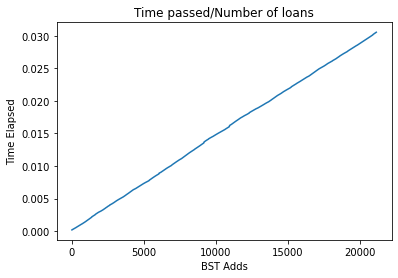

In [16]:
#Q6
from matplotlib import pyplot as plt
import time

startTime = time.time()
tree = search.BST()

y = []
x = []

count = 0
for loan in bank.loans:
    tree.add(loan.interest_rate,loan)
    
    y.append(time.time()-startTime)
    x.append(count)
    
    count+=1
plt.title("Time passed/Number of loans")
plt.ylabel("Time Elapsed")
plt.xlabel("BST Adds")

plt.plot(x,y)
plt.show()

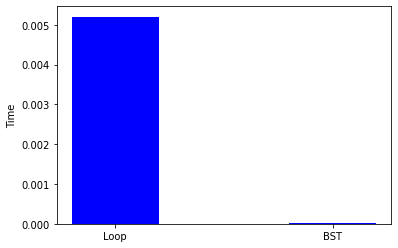

In [17]:
#Q7
counter = 0
startTime = time.time()
for loan in bank.loans:
    if loan.interest_rate == -1:
        counter+=1
endTime = time.time()
loop_time = endTime - startTime
startTime = time.time()
endTime = time.time()
tree_time = endTime - startTime
bar_name_list = ["Loop","BST"]
bar_data_list = [loop_time,tree_time]
plt.bar(bar_name_list,bar_data_list,color="blue",width=0.4)
plt.ylabel("Time")
plt.show()

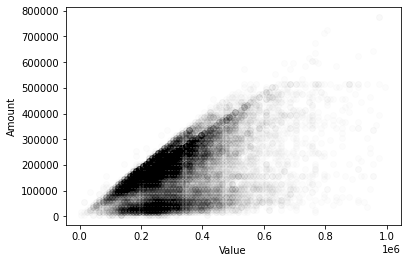

In [18]:
#Q8
loan_amount = []
property_value = []

for loan in bank.loans:
    if 999999 > loan.property_value > 0:
        property_value.append(loan.property_value)
        loan_amount.append(loan.loan_amount)
plt.scatter(property_value,loan_amount,c="black",alpha=0.01)
plt.xlabel("Value")
plt.ylabel("Amount")
plt.show()

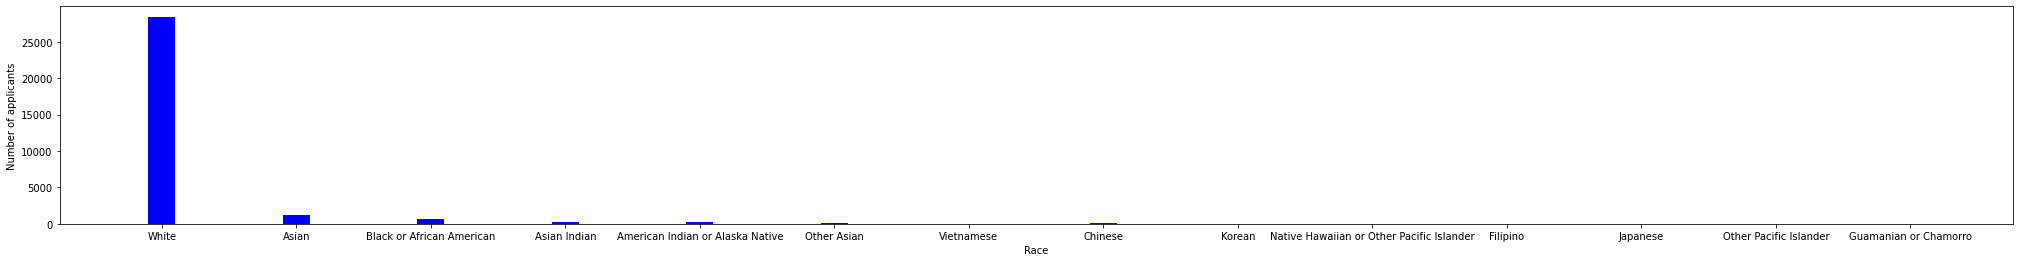

In [19]:
#Q9
race_dict = {}
for loan in bank.loans:
    for applicant in loan.applicants:
        if (len(applicant.race) != 0):
            for race in applicant.race:
                if (race not in race_dict.keys()):
                    race_dict[race] = 0
                race_dict[race] = race_dict[race]+1

f = plt.figure()
f.set_figwidth(35)
plt.xlabel("Race")
plt.ylabel("Number of applicants")
plt.bar(race_dict.keys(),race_dict.values(),color="blue",width=0.2)

plt.show()

In [20]:
#Q10
def sum_node(node):
    if node is None:
        return 0
    return sum_node(node.left)+sum_node(node.right)+1
sum = 0
sum_node(tree.root)

32